# Resampling

In [1]:
#import librarys
from osgeo import gdal
from rasterio.plot import show
import rasterio
import os
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
import glob
import numpy as np

##### entry directorys

In [2]:
#entry and exit routes
dir = os.getcwd()
input_path = dir + '/imagenes/'
output_path = dir + '/Output/'

In [3]:
#for loop with in keyword, to traverse our input path, and set a search criteria
bandList = [band for band in os.listdir(input_path) if band[-4:]=='.tif']
print(bandList)

['B3.tif', 'B4.tif', 'B8.tif', 'Corte.tif']


In [4]:
input_directory= dir + '/imagenes/'
criteria =  "B*.tif"
p = os.path.join(input_directory, criteria)
list_files  =  glob.glob(p)
print(list_files)

['e:\\Repo Test\\BinderTester\\BinderTester/imagenes\\B3.tif', 'e:\\Repo Test\\BinderTester\\BinderTester/imagenes\\B4.tif', 'e:\\Repo Test\\BinderTester\\BinderTester/imagenes\\B8.tif']


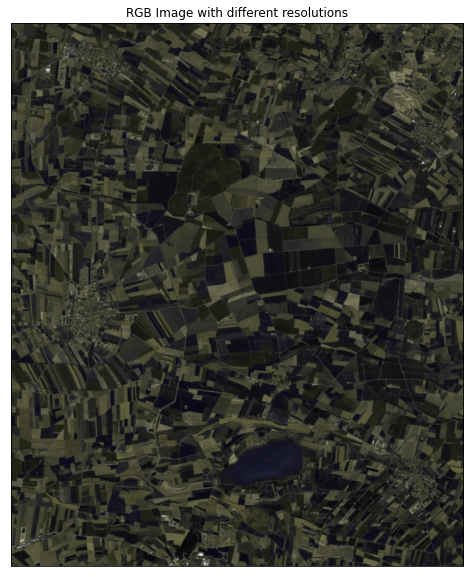

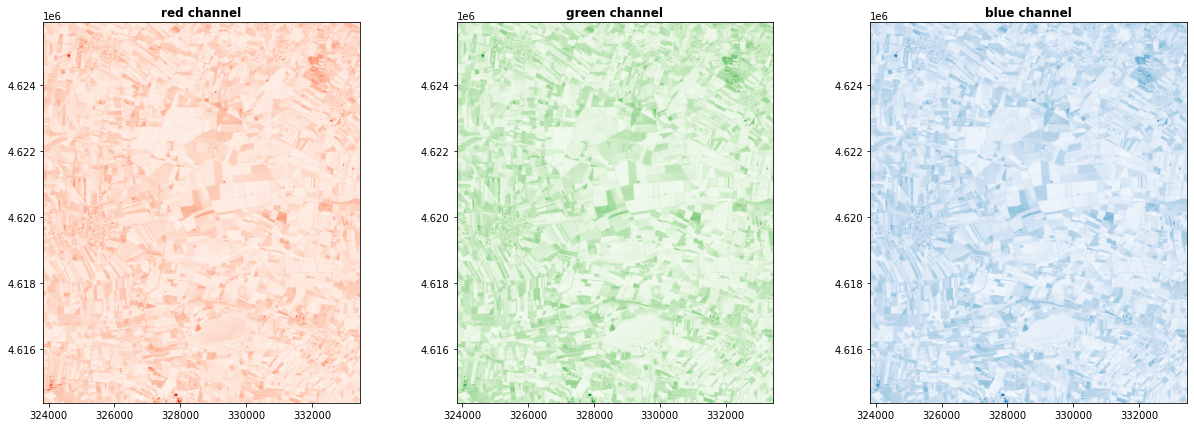

In [5]:
# #Show
arr_st, meta = es.stack(list_files, nodata=-9999)
# # fig, ax = plt.subplots(figsize=(12, 12))
# # Plot red, green, and blue bands, respectively
# plt.figure()
ep.plot_rgb(arr_st, rgb=(2, 1, 0),title="RGB Image with different resolutions")

img_stack = dir + '/list_files.tif' 

with rasterio.open(img_stack, 'w', **meta) as dst:
    for id, layer in enumerate(list_files, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

full_data = rasterio.open(img_stack)

# # add_subplot(rows, columns, i)
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((full_data, 1), ax=axr, cmap='Reds', title='red channel')
show((full_data, 2), ax=axg, cmap='Greens', title='green channel') 
show((full_data, 3), ax=axb, cmap='Blues', title='blue channel')

##### run the gdal warp program and options

In [6]:
#implement the functions of the gdal - ogr class. Here is the initial step to reduce sentinel 2 images that are not 10 m
for band in bandList:
    options = gdal.WarpOptions(format = 'GTiff', xRes = 10, yRes = 10, resampleAlg = gdal.GRA_Bilinear) # Se utiliza bilinear
    outBand = gdal.Warp(srcDSOrSrcDSTab=os.path.join(input_path + band),
                        destNameOrDestDS=output_path + band[:-4]+'_Resamp'+band[-4:],
                        options=options)

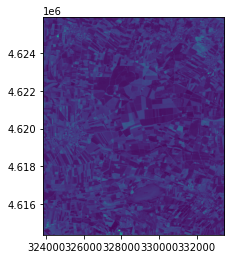

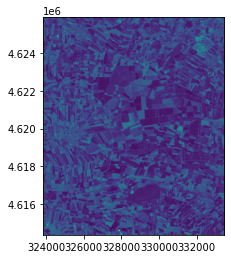

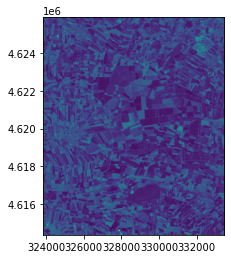

In [8]:
output_directory= dir + '/Output/'
criteria =  "B*_Resamp.tif"
p = os.path.join(output_directory, criteria)
list_files  =  glob.glob(p)

a = rasterio.open(list_files[0])
b = rasterio.open(list_files[1])
c = rasterio.open(list_files[2])

show(a)
show(b)
show(c)


In [14]:
#close in memory 
outBand= None
#verificate
print("finalizado")

finalizado
